<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Smart Supply Chain </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         February 2023, Paris | © Saeed VARASTEH
    </span>
</div>

### Part 05 - Exercises 02 : The Forecast Competition

---
<img src="images/competition.png" style="width:100px; position:absolute; top:-10px; right:0;"/>

__Objective__: Predict three months of item sales at different stores.

__Dataset description__

You are given a file named `store_sales.csv`:

    date - Date
    store - Store ID
    item - Item ID
    sales - Number of items sold at a particular store on a particular date.
    


### Import data and modules

#### Import modules

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

#### Import data

In [81]:
df = pd.read_csv('./data/store/store_sales.csv')
print(df.shape)
df.head(5)

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


## <span style="color:steelblue;">  Data Exploration  </span>


#### The data in the sales dataset are from which period?

__Hint:__ find the minimum and the maximum of the date.<br/>
__Hint:__ do not forget to convert the `date` column into datetime.

In [84]:
df["date"] = pd.to_datetime(df["date"])

In [85]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [86]:
sales["date"].min()

Timestamp('2013-01-01 00:00:00')

In [87]:
sales["date"].max()

Timestamp('2017-12-31 00:00:00')

#### How many unique items and stores are in the dataset?

In [88]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [89]:
df["item"].nunique()

50

In [90]:
df["store"].nunique()

10

#### Plot average monthly sales for the item_id == 10 at store_id == 1

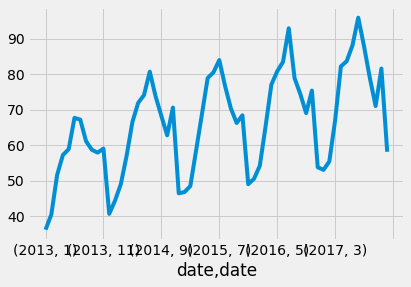

In [91]:
item_10_1 = sales.loc[ (sales["item"] == 10) & (sales["store"] == 1), ["date","sales"]].set_index("date")
item_10_1.groupby([item_10_1.index.year,item_10_1.index.month])['sales'].mean().plot();

In [73]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [21]:
# monthly = df.drop(columns = ["store","item"])

In [23]:
# monthly = monthly.groupby("date").mean()

In [24]:
# monthly

,sales
date,
2013-01-01,27.392
2013-01-02,27.356
2013-01-03,28.976
2013-01-04,31.354
2013-01-05,32.474
...,...
2017-12-27,40.756
2017-12-28,43.770
2017-12-29,47.070


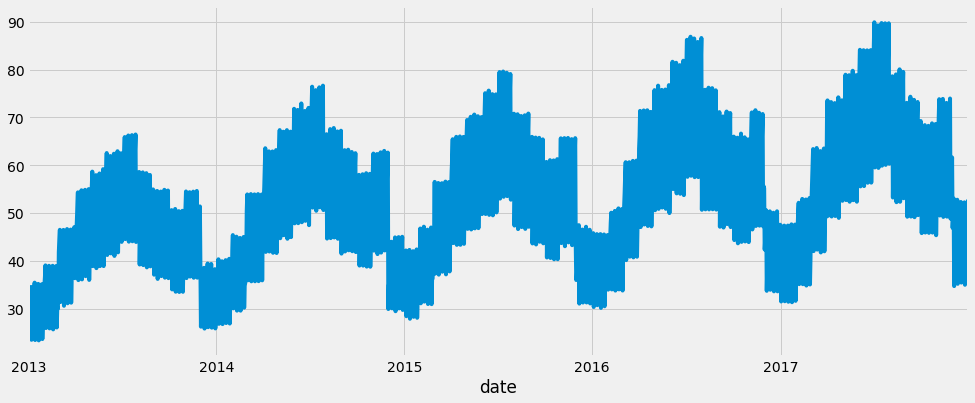

In [26]:
# fig = plt.figure(figsize=(15, 6))
# monthly["sales"].plot(kind="line");

In [74]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

---

## <span style="color:steelblue;">  Machine Learning for Time Series Forecasting  </span>


### <span style="color:DarkGray;">  Data preprocessing and Feature engineering  </span>

#### Extract some useful features (e.g. lag, rolling mean, datetime) to use in a machine learning model and them to the `sales` DataFrame.

In [97]:
df.sort_values(by=['date'], axis = 0, inplace=True)

In [98]:
df.head()

,date,store,item,sales,lag_28
0,2013-01-01,1,1,13,NaN
211816,2013-01-01,7,12,26,NaN
832656,2013-01-01,7,46,27,NaN
213642,2013-01-01,8,12,54,NaN
215468,2013-01-01,9,12,35,NaN


In [93]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [94]:
df.shape

(913000, 4)

In [100]:
df["lag_28"] = df[["store", "item", "sales"]].groupby(["store", "item"])["sales"].shift(28)

In [103]:
df

,date,store,item,sales,lag_28
0,2013-01-01,1,1,13,NaN
211816,2013-01-01,7,12,26,NaN
832656,2013-01-01,7,46,27,NaN
213642,2013-01-01,8,12,54,NaN
215468,2013-01-01,9,12,35,NaN
...,...,...,...,...,...
619013,2017-12-31,9,34,21,32.0
620839,2017-12-31,10,34,32,28.0
622665,2017-12-31,1,35,55,55.0
598927,2017-12-31,8,33,100,95.0


In [ ]:
 ca_sales["rmean_7"] = ca_sales[["id", "sales"]].groupby("id")["sales"].transform(lambda x : x.rolling(7).mean())

In [105]:
df

,date,store,item,sales,lag_28
0,2013-01-01,1,1,13,NaN
211816,2013-01-01,7,12,26,NaN
832656,2013-01-01,7,46,27,NaN
213642,2013-01-01,8,12,54,NaN
215468,2013-01-01,9,12,35,NaN
...,...,...,...,...,...
619013,2017-12-31,9,34,21,32.0
620839,2017-12-31,10,34,32,28.0
622665,2017-12-31,1,35,55,55.0
598927,2017-12-31,8,33,100,95.0


In [107]:
df["rmean_7"] = df[["store", "item", "sales"]].groupby(["store", "item"])["sales"].transform(lambda x : x.rolling(7).mean())

In [110]:
df

,date,store,item,sales,lag_28,rmean_7
0,2013-01-01,1,1,13,NaN,NaN
211816,2013-01-01,7,12,26,NaN,NaN
832656,2013-01-01,7,46,27,NaN,NaN
213642,2013-01-01,8,12,54,NaN,NaN
215468,2013-01-01,9,12,35,NaN,NaN
...,...,...,...,...,...,...
619013,2017-12-31,9,34,21,32.0,20.714286
620839,2017-12-31,10,34,32,28.0,23.571429
622665,2017-12-31,1,35,55,55.0,52.285714
598927,2017-12-31,8,33,100,95.0,69.142857


In [112]:
df["rmean_28_7"] = df[["store", "item", "lag_28"]].groupby("store")["lag_28"].transform(lambda x : x.rolling(7).mean())

In [172]:
mean_price = df[["store", "item","sales"]].groupby("store")["sales"].transform(lambda x : x.rolling(7).mean())

In [174]:
df["price_mad"] = (df["sales"] - mean_price) / mean_price

In [175]:
df

,date,store,item,sales,lag_28,rmean_7,rmean_28_7,price_mad
671996,2013-01-29,9,37,16,22.0,16.714286,22.428571,NaN
836336,2013-01-29,9,46,32,34.0,35.857143,24.285714,NaN
701212,2013-01-29,5,39,23,20.0,16.285714,23.285714,NaN
522264,2013-01-29,7,29,26,27.0,27.142857,20.714286,NaN
339664,2013-01-29,7,19,16,6.0,17.285714,18.142857,NaN
...,...,...,...,...,...,...,...,...
619013,2017-12-31,9,34,21,32.0,20.714286,56.571429,-0.568915
620839,2017-12-31,10,34,32,28.0,23.571429,64.428571,-0.487414
622665,2017-12-31,1,35,55,55.0,52.285714,51.142857,0.049046
598927,2017-12-31,8,33,100,95.0,69.142857,71.571429,0.380671


In [176]:
df.dropna(subset=["lag_28","rmean_7","rmean_28_7","price_mad"], inplace=True)


### <span style="color:DarkGray;">  Train and test split  </span>

#### Split sales data into the __train__ and __test__ datasets. 

In [177]:
split_date = "2017-10-01"

In [178]:
train = df.loc[sales.date < split_date].copy()
test = df.loc[sales.date >= split_date].copy()

In [179]:
print(train.shape)
print(test.shape)

(852880, 8)
(46000, 8)


In [180]:
train

,date,store,item,sales,lag_28,rmean_7,rmean_28_7,price_mad
10984,2013-01-29,7,1,9,7.0,10.428571,15.285714,-0.322581
613564,2013-01-29,7,34,10,9.0,8.857143,12.714286,-0.090909
116892,2013-01-29,5,7,29,21.0,26.857143,17.714286,0.268750
412704,2013-01-29,7,23,11,7.0,11.428571,12.857143,0.069444
500352,2013-01-29,5,28,25,41.0,34.571429,20.714286,0.080247
...,...,...,...,...,...,...,...,...
447277,2017-09-30,5,25,102,81.0,76.571429,64.714286,0.626424
445451,2017-09-30,4,25,103,102.0,100.285714,86.000000,0.155449
138683,2017-09-30,6,8,74,92.0,69.285714,56.142857,0.407609
496579,2017-09-30,2,28,171,152.0,144.000000,95.714286,0.802711


In [181]:
test

,date,store,item,sales,lag_28,rmean_7,rmean_28_7,price_mad
414410,2017-10-01,7,23,27,34.0,25.000000,46.857143,-0.442478
290242,2017-10-01,9,16,35,21.0,30.285714,63.285714,-0.439359
315806,2017-10-01,3,18,118,127.0,109.285714,83.857143,0.390572
726656,2017-10-01,8,40,48,51.0,44.571429,84.428571,-0.362429
478320,2017-10-01,2,27,37,48.0,33.428571,83.857143,-0.551127
...,...,...,...,...,...,...,...,...
619013,2017-12-31,9,34,21,32.0,20.714286,56.571429,-0.568915
620839,2017-12-31,10,34,32,28.0,23.571429,64.428571,-0.487414
622665,2017-12-31,1,35,55,55.0,52.285714,51.142857,0.049046
598927,2017-12-31,8,33,100,95.0,69.142857,71.571429,0.380671


#### Create input (`x`) and output (`y`) variables
Note: use __sales__ as the output column.

In [182]:
x_train = train.drop(columns=["sales","date"])
y_train = train["sales"]
x_test = test.drop(columns=["sales","date"])
y_test = test["sales"]

In [183]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(852880, 6) (852880,)
(46000, 6) (46000,)


In [184]:
x_train

,store,item,lag_28,rmean_7,rmean_28_7,price_mad
10984,7,1,7.0,10.428571,15.285714,-0.322581
613564,7,34,9.0,8.857143,12.714286,-0.090909
116892,5,7,21.0,26.857143,17.714286,0.268750
412704,7,23,7.0,11.428571,12.857143,0.069444
500352,5,28,41.0,34.571429,20.714286,0.080247
...,...,...,...,...,...,...
447277,5,25,81.0,76.571429,64.714286,0.626424
445451,4,25,102.0,100.285714,86.000000,0.155449
138683,6,8,92.0,69.285714,56.142857,0.407609
496579,2,28,152.0,144.000000,95.714286,0.802711


In [185]:
x_train.isnull().sum()/len(x_train)

store         0.0
item          0.0
lag_28        0.0
rmean_7       0.0
rmean_28_7    0.0
price_mad     0.0
dtype: float64

In [186]:
x_test

,store,item,lag_28,rmean_7,rmean_28_7,price_mad
414410,7,23,34.0,25.000000,46.857143,-0.442478
290242,9,16,21.0,30.285714,63.285714,-0.439359
315806,3,18,127.0,109.285714,83.857143,0.390572
726656,8,40,51.0,44.571429,84.428571,-0.362429
478320,2,27,48.0,33.428571,83.857143,-0.551127
...,...,...,...,...,...,...
619013,9,34,32.0,20.714286,56.571429,-0.568915
620839,10,34,28.0,23.571429,64.428571,-0.487414
622665,1,35,55.0,52.285714,51.142857,0.049046
598927,8,33,95.0,69.142857,71.571429,0.380671


### <span style="color:DarkGray;"> Model training and validation </span>

#### Train a  model on the train and validate your model on the test dataset (report your SMAPE score)

In [187]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#### Linear Regression model

In [188]:
%%time
from sklearn.linear_model import LinearRegression

# Fitting the model on train
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 14.550300142270384
CPU times: user 238 ms, sys: 39.9 ms, total: 278 ms
Wall time: 138 ms


#### Your model

In [140]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 7.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [160]:
from sklearn.metrics import mean_squared_error
results = pd.DataFrame(columns=["MSE"])

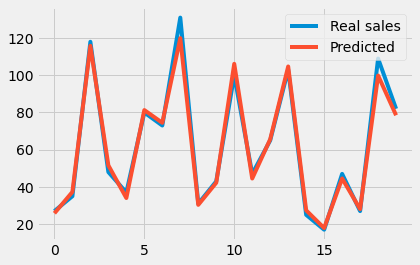

LR SMAPE: 11.034405221659705
CPU times: user 30min 11s, sys: 26.8 s, total: 30min 37s
Wall time: 4min 10s


In [197]:
%%time
import xgboost as xgb

# Fitting the model on train
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators= 1300)
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Some visuals
plt.plot(y_test.values[0:20], label = "Real sales");
plt.plot(y_pred[0:20], label = "Predicted");
plt.legend(); plt.show();

# Evaluating with MSE
results.loc['XGBoost'] = mean_squared_error(y_test, y_pred)
results.head()

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

In [ ]:
results.head()

In [164]:
pip install lightgbm

     |████████████████████████████████| 1.3 MB 8.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [169]:
pip install catboost

     |████████████████████████████████| 22.0 MB 190 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


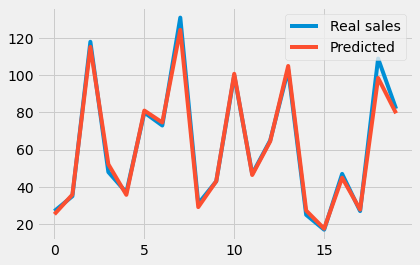

CatBoost SMAPE: 11.296642626260425


In [191]:
import catboost as cb

# Initializing the model
model = cb.CatBoostRegressor()

# Fitting the model on the training data
model.fit(x_train, y_train, verbose=False)

# Predicting the outputs for test data
y_pred = model.predict(x_test)

# Visualizing the predictions
plt.plot(y_test.values[0:20], label = "Real sales")
plt.plot(y_pred[0:20], label = "Predicted")
plt.legend()
plt.show()

# Evaluating the model with MSE
results.loc['CatBoost'] = mean_squared_error(y_test, y_pred)
results.head()

# Evaluating the model with SMAPE
print(f"CatBoost SMAPE: {smape(np.c_[y_test], np.c_[y_pred])}")


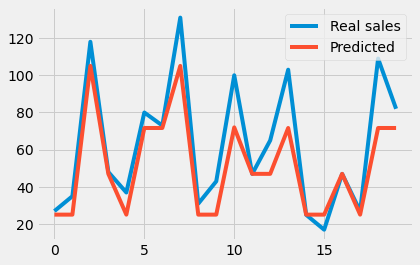

CPU times: user 39.8 s, sys: 508 ms, total: 40.3 s
Wall time: 40.7 s


,MSE
XGBoost,61.656200
CatBoost,62.064035
Random Forest,164.148015


In [193]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Fitting the model on train
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Some visuals
plt.plot(y_test.values[0:20], label = "Real sales");
plt.plot(y_pred[0:20], label = "Predicted");
plt.legend(); plt.show();

# Evaluating with MSE
results.loc['Random Forest'] = mean_squared_error(y_test, y_pred)
results.head()

---

FINAL SCORE: 
MODEL: